In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **EDA Project on the Apple App Store**

In [146]:
# Read app store file 
apps = pd.read_csv('AppleStore.csv', index_col = 'id')
# Remove the original index
del apps['Unnamed: 0']
apps.head()

,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
id,,,,,,,,,,,,,,,
281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [147]:
# Read app description fle
appDesc = pd.read_csv('appleStore_description.csv', usecols=['id','app_desc'], index_col='id')
# Merge two files, set app id to index
appStore = apps.merge(appDesc, how='inner', on=apps.index.values)
appStore.rename(columns={'key_0':'id'}, inplace=True)
appStore.set_index('id', inplace=True)
appStore

,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc
id,,,,,,,,,,,,,,,,
281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n..."
281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...
281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...
282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...
282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187617475,Kubik,126644224,USD,0.00,142,75,4.5,4.5,1.3,4+,Games,38,5,1,1,Place the falling blocks correctly in order to...
1187682390,VR Roller-Coaster,120760320,USD,0.00,30,30,4.5,4.5,0.9,4+,Games,38,0,1,1,A thrilling virtual reality roller coaster exp...
1187779532,Bret Michaels Emojis + Lyric Keyboard,111322112,USD,1.99,15,0,4.5,0.0,1.0.2,9+,Utilities,37,1,1,1,"Rock star Bret Michaels, winner of Celebrity A..."


In [148]:
# Display basic information of the dataset
print("The shape of this data set is", appStore.shape, "\n")

The shape of this data set is (7197, 16) 



In [149]:
print(appStore.info())
# Display the first five rows of data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 281656475 to 1188375727
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        7197 non-null   object 
 1   size_bytes        7197 non-null   int64  
 2   currency          7197 non-null   object 
 3   price             7197 non-null   float64
 4   rating_count_tot  7197 non-null   int64  
 5   rating_count_ver  7197 non-null   int64  
 6   user_rating       7197 non-null   float64
 7   user_rating_ver   7197 non-null   float64
 8   ver               7197 non-null   object 
 9   cont_rating       7197 non-null   object 
 10  prime_genre       7197 non-null   object 
 11  sup_devices.num   7197 non-null   int64  
 12  ipadSc_urls.num   7197 non-null   int64  
 13  lang.num          7197 non-null   int64  
 14  vpp_lic           7197 non-null   int64  
 15  app_desc          7197 non-null   object 
dtypes: float64(3), int64(7), obj

In [150]:
appStore.describe()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


In [151]:
# Remove duplicates
duplicatedRows = appStore[appStore.duplicated()]
print("Number of duplicated rows:" , duplicatedRows.shape)
# Check null values
print("Number of null values:", appStore.isnull().sum().sum())

Number of duplicated rows: (0, 16)
Number of null values: 0


**App Statistics for Different Groups**

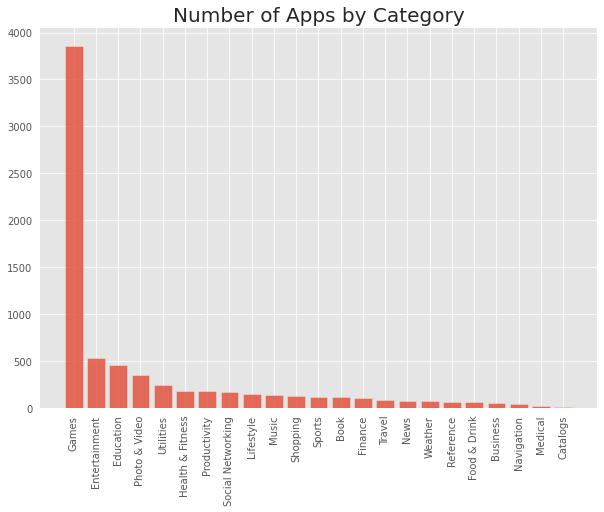

In [152]:
# Prime genre
plt.style.use('ggplot')
counts = appStore['prime_genre'].value_counts()
plt.figure(figsize=(10,7))
plt.bar(counts.index, counts, alpha=0.8)
plt.xticks(rotation = 90)
plt.title('Number of Apps by Category', fontsize=20)
plt.show()

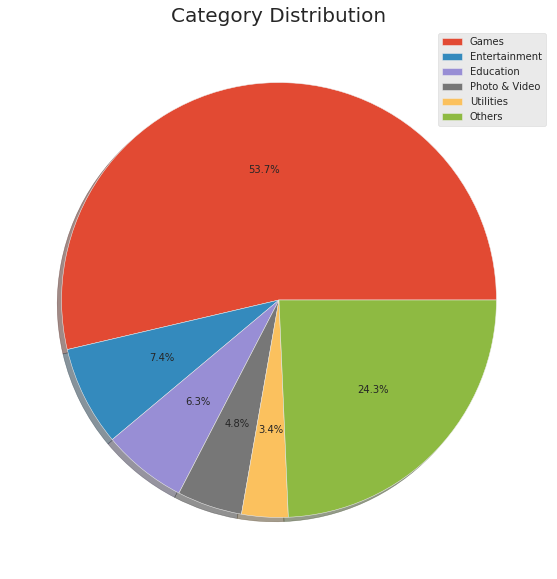

In [154]:
# Distribution
category = pd.Series(data=list(counts[:5])+[counts[5:].sum()], index=list(counts.keys())[:5]+['Others'])
plt.figure(figsize=(10,10))
plt.pie(category.values, autopct='%1.1f%%', shadow=True)
plt.title('Category Distribution', fontsize=20)
plt.legend(category.keys(), loc='best')
plt.show()

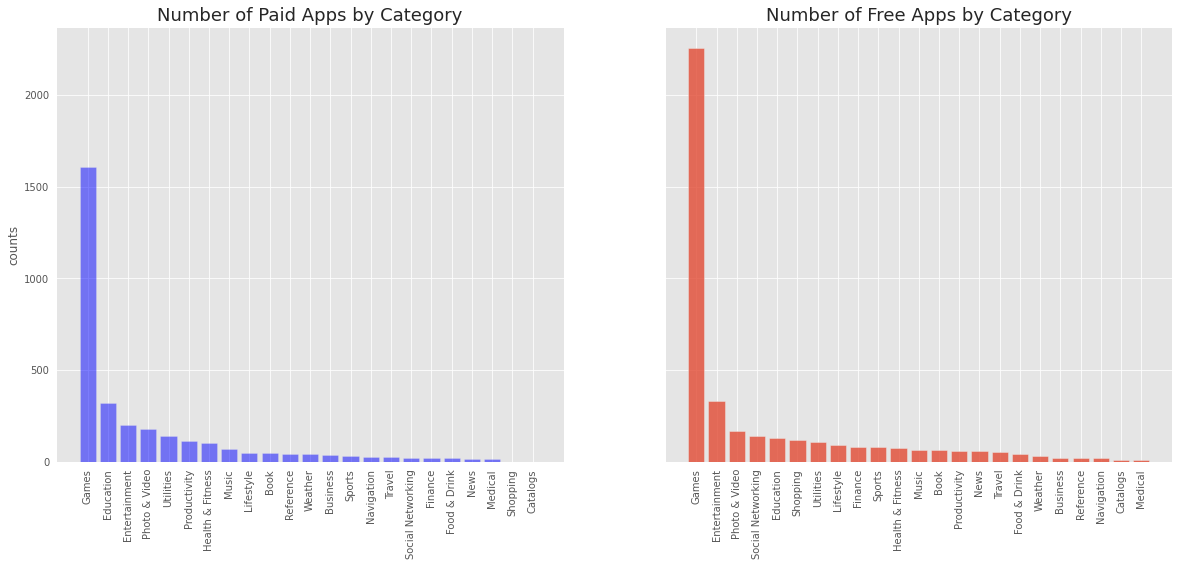

In [155]:
# Number of paid vs free apps
paidApps = appStore[appStore['price']>0]
freeApps = appStore[appStore['price']==0]
paidcounts = paidApps['prime_genre'].value_counts()
freecounts = freeApps['prime_genre'].value_counts()
# Subplot1
myFig, myAxes = plt.subplots(1, 2, sharey=True, figsize=(20,8))
myAxes[0].bar(paidcounts.index, paidcounts, color='b', alpha=0.5)
myAxes[0].set_ylabel('counts')
myAxes[0].set_title('Number of Paid Apps by Category', fontsize=18)
myAxes[0].tick_params(axis='x', rotation=90)
# Subplot2
myAxes[1].bar(freecounts.index,freecounts, alpha=0.8)
myAxes[1].set_title('Number of Free Apps by Category', fontsize=18)
myAxes[1].tick_params(axis='x', rotation=90)

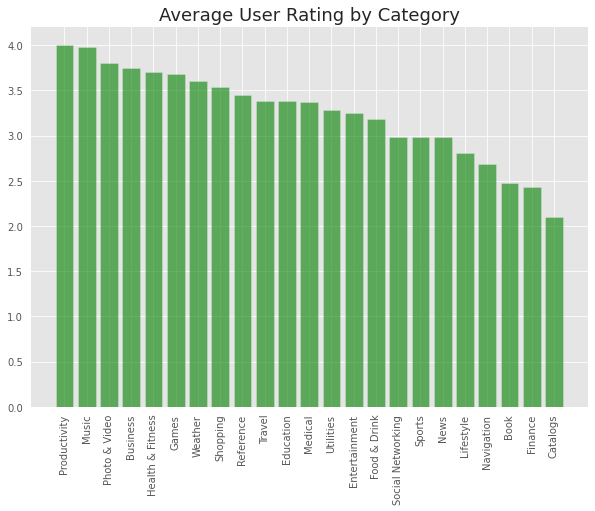

In [156]:
genre = appStore.groupby('prime_genre').mean()
genre = genre.sort_values(by='user_rating', ascending=False)
# User rating of each category
plt.figure(figsize=(10,7))
plt.bar(genre.index.values, genre['user_rating'], color='g', alpha=0.6)
plt.xticks(rotation = 90)
plt.title('Average User Rating by Category', fontsize=18)
plt.show()

## **Are Paid Apps Better Than Free Apps?**

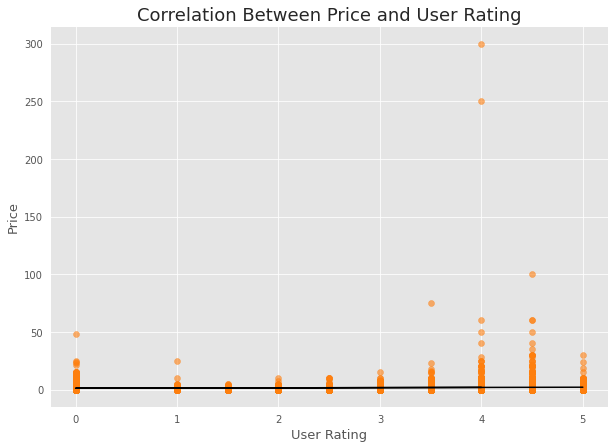

In [157]:
# Correlation
plt.figure(figsize=(10,7))
plt.scatter(appStore['user_rating'], appStore['price'], color='tab:orange', alpha=0.6)
fit = np.polyfit(appStore['user_rating'], appStore['price'], 1)
line = np.poly1d(fit)
plt.plot(appStore['user_rating'], line(appStore['user_rating']), 'k-')
plt.xlabel('User Rating', fontsize=13)
plt.ylabel('Price', fontsize=13)
plt.title('Correlation Between Price and User Rating', fontsize=18)
plt.show()

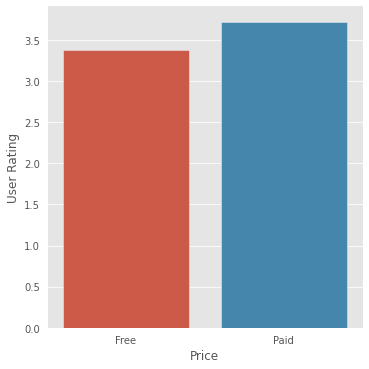

In [188]:
appStore['Paid'] = appStore['price'] > 0
import seaborn as sns
p = sns.catplot(x='Paid', y='user_rating', data=appStore, kind='bar', ci=None)
p.set_axis_labels('Price', 'User Rating')
p.set_xticklabels(['Free', 'Paid'])
plt.show()

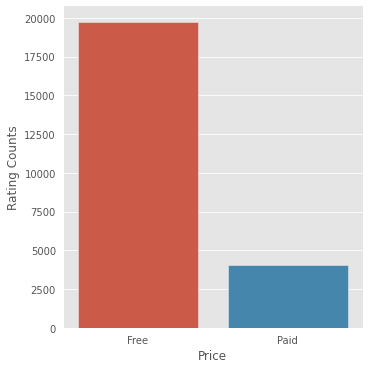

In [191]:
c = sns.catplot(x='Paid', y='rating_count_tot', data=appStore, kind='bar', ci=None)
c.set_axis_labels('Price', 'Rating Counts')
c.set_xticklabels(['Free', 'Paid'])
c.set_titles('{Rating Counts of Paid and Free Apps}')
plt.show()

## **What are some possible factors that contribute to higher ratings?**

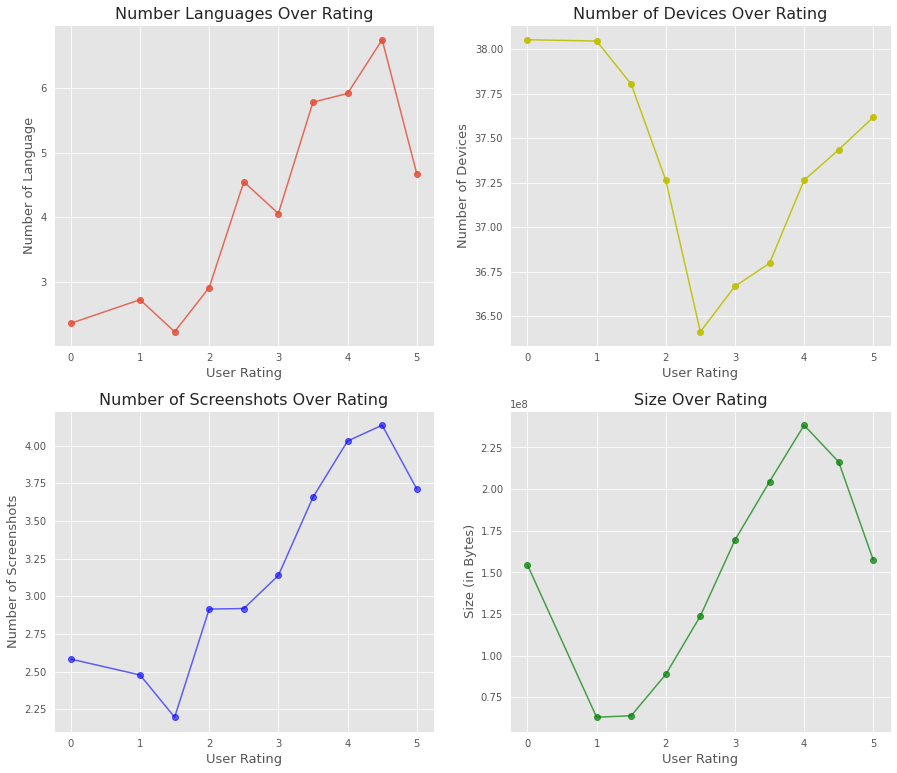

In [138]:
# Language supported, number of devices, size in bytes, version
uRating = appStore.groupby('user_rating').mean()
#Number of language supported
myFig, myAxes = plt.subplots(2, 2, figsize=(15,13))
myAxes[0,0].plot(uRating.index, uRating['lang.num'], alpha=0.8, marker='o')
myAxes[0,0].set_xlabel('User Rating', fontsize=13)
myAxes[0,0].set_ylabel('Number of Language', fontsize=13)
myAxes[0,0].set_title('Number Languages Over Rating', fontsize=16)
# Number of devices supported
myAxes[0,1].plot(uRating.index, uRating['sup_devices.num'], color='y', alpha=0.9, marker='o')
myAxes[0,1].set_xlabel('User Rating', fontsize=13)
myAxes[0,1].set_ylabel('Number of Devices', fontsize=13)
myAxes[0,1].set_title('Number of Devices Over Rating', fontsize=16)
# Number of screenshots displayed
myAxes[1,0].plot(uRating.index, uRating['ipadSc_urls.num'], color='b', alpha=0.6, marker='o')
myAxes[1,0].set_xlabel('User Rating', fontsize=13)
myAxes[1,0].set_ylabel('Number of Screenshots', fontsize=13)
myAxes[1,0].set_title('Number of Screenshots Over Rating', fontsize=16)
# Size
myAxes[1,1].plot(uRating.index, uRating['size_bytes'], color='g', alpha=0.7, marker='o')
myAxes[1,1].set_xlabel('User Rating', fontsize=13)
myAxes[1,1].set_ylabel('Size (in Bytes)', fontsize=13)
myAxes[1,1].set_title('Size Over Rating', fontsize=16)
plt.show()

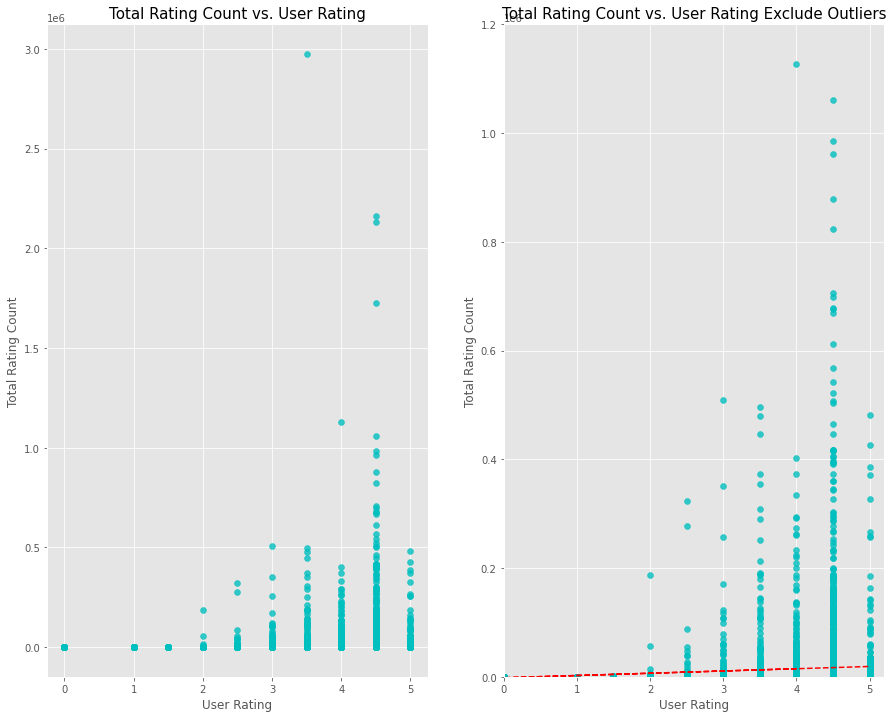

In [106]:
# Rating and total user count - little effect
plt.figure(figsize=(15,12))
plt.subplot(1,2,1)
plt.scatter(appStore['user_rating'], appStore['rating_count_tot'], color='c', alpha=0.8)
plt.xlabel('User Rating')
plt.ylabel('Total Rating Count')
plt.title('Total Rating Count vs. User Rating', fontsize=15)
plt.subplot(1,2,2)
plt.scatter(appStore['user_rating'], appStore['rating_count_tot'], color='c', alpha=0.8)
fit = np.polyfit(appStore['user_rating'], appStore['rating_count_tot'], 1)
line = np.poly1d(fit)
plt.plot(appStore['user_rating'], line(appStore['user_rating']), 'r--')
plt.axis([0, 5.2, -1, 1.2e+06])
plt.xlabel('User Rating')
plt.ylabel('Total Rating Count')
plt.title('Total Rating Count vs. User Rating Exclude Outliers', fontsize=15)
plt.show()